# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCFanIn/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestMFGoCPlasticity10'
simulation_time = 1000
analysis_time = 10.0
analysis_step = 10.0
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 12345
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['goclayer']['cm'] = 50.0e-12
simulation.config_options['goclayer']['grest'] = 3.0e-9
#simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIF'
simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIFwAT'
simulation.config_options['goclayer']['tau_th'] = 6.0e3
simulation.config_options['goclayer']['th_cons'] = 2.0e1
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgocsynapsis']['average_number_of_source_cells'] = 2000.0
simulation.config_options['mfgocsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 6.0e-11
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 6.5e-11
simulation.config_options['mfgocsynapsis']['weight_recording'] = True
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
simulation.config_options['mfgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgocsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgocsynapsis']['minus_plus_ratio'] = 1.46
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgocsynapsis']['max_weight'] = 4.225e-11

Initialize the simulation

In [5]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-06-28 15:00:26,538 - P17069 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 1000s
2018-06-28 15:00:26,566 - P17069 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-06-28 15:00:26,670 - P17069 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-06-28 15:00:26,672 - P17069 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGoCPlasticity10
2018-06-28 15:00:26,694 - P17069 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-06-28 15:00:26,698 - P17069 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-06-28 15:00:26,729 - P17069 - MemTotal:87M - Simulation - DEBUG: Setting Global NEST Seed: 12356
2018-06-28 15:00:26,730 - P17069 - MemTotal:87M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366]
2018-06-28 15:00:26,732 - P17069 - MemTotal:87M - Simulation - WARNING: Non-specified cell model para

Define a function to obtain the average firing rate

In [ ]:
def obtain_fr(init_time,end_time):
    min_neuron = 0
    max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
    import numpy
    firing_frequency = float(len(gcell_id)) / ((end_time-init_time)*max_neuron)
    return firing_frequency

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


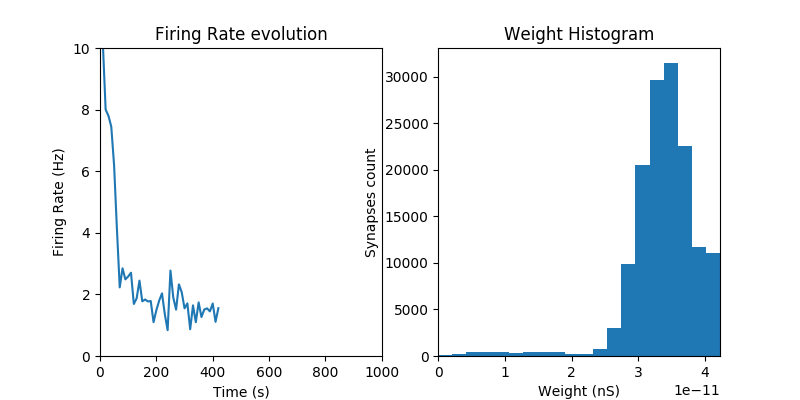

2018-06-28 15:00:31,692 - P17069 - MemTotal:634M - Simulation - INFO: Running the simulation from 0.0s until time 10.0s
2018-06-28 15:00:31,714 - P17069 - MemTotal:634M - Simulation - DEBUG: Running the simulation 0.177s until 0.177s
2018-06-28 15:00:32,035 - P17069 - MemTotal:634M - Simulation - DEBUG: Simulation time is 0.319655179977 seconds. Real-time rate: 0.5537216697458327
2018-06-28 15:00:32,053 - P17069 - MemTotal:634M - Simulation - DEBUG: Running the simulation 0.11299999999999999s until 0.29s
2018-06-28 15:00:32,220 - P17069 - MemTotal:634M - Simulation - DEBUG: Simulation time is 0.165325164795 seconds. Real-time rate: 0.6835015113408246
2018-06-28 15:00:32,238 - P17069 - MemTotal:635M - Simulation - DEBUG: Running the simulation 0.964s until 1.254s
2018-06-28 15:00:33,301 - P17069 - MemTotal:635M - Simulation - DEBUG: Simulation time is 1.06140303612 seconds. Real-time rate: 0.9082318094040518
2018-06-28 15:00:33,317 - P17069 - MemTotal:635M - Simulation - DEBUG: Running 

2018-06-28 15:00:40,458 - P17069 - MemTotal:635M - Simulation - DEBUG: Simulation time is 0.781657934189 seconds. Real-time rate: 0.9364710162631759
2018-06-28 15:00:40,485 - P17069 - MemTotal:635M - Simulation - DEBUG: Running the simulation 0.04699999999999971s until 7.4559999999999995s
2018-06-28 15:00:40,554 - P17069 - MemTotal:635M - Simulation - DEBUG: Simulation time is 0.0676419734955 seconds. Real-time rate: 0.6948348424981716
2018-06-28 15:00:40,569 - P17069 - MemTotal:635M - Simulation - DEBUG: Running the simulation 0.21699999999999964s until 7.672999999999999s
2018-06-28 15:00:40,871 - P17069 - MemTotal:635M - Simulation - DEBUG: Simulation time is 0.299513101578 seconds. Real-time rate: 0.7245092079675275
2018-06-28 15:00:40,889 - P17069 - MemTotal:635M - Simulation - DEBUG: Running the simulation 0.07000000000000028s until 7.742999999999999s
2018-06-28 15:00:40,995 - P17069 - MemTotal:635M - Simulation - DEBUG: Simulation time is 0.103547811508 seconds. Real-time rate: 0

2018-06-28 15:00:51,326 - P17069 - MemTotal:626M - Simulation - DEBUG: Simulation time is 0.290550947189 seconds. Real-time rate: 0.874201245795582
2018-06-28 15:00:51,341 - P17069 - MemTotal:626M - Simulation - DEBUG: Running the simulation 0.7140000000000004s until 13.686000000000002s
2018-06-28 15:00:52,342 - P17069 - MemTotal:626M - Simulation - DEBUG: Simulation time is 0.998714923859 seconds. Real-time rate: 0.7149187249965031
2018-06-28 15:00:52,360 - P17069 - MemTotal:626M - Simulation - DEBUG: Running the simulation 0.11100000000000065s until 13.797000000000002s
2018-06-28 15:00:52,518 - P17069 - MemTotal:626M - Simulation - DEBUG: Simulation time is 0.156330823898 seconds. Real-time rate: 0.7100327192812598
2018-06-28 15:00:52,536 - P17069 - MemTotal:626M - Simulation - DEBUG: Running the simulation 0.2400000000000002s until 14.037000000000003s
2018-06-28 15:00:52,860 - P17069 - MemTotal:626M - Simulation - DEBUG: Simulation time is 0.322566986084 seconds. Real-time rate: 0.7

2018-06-28 15:01:00,999 - P17069 - MemTotal:626M - Simulation - DEBUG: Simulation time is 0.135160923004 seconds. Real-time rate: 0.8656348107093658
2018-06-28 15:01:01,015 - P17069 - MemTotal:626M - Simulation - DEBUG: Running the simulation 0.10300000000000153s until 19.924000000000003s
2018-06-28 15:01:01,127 - P17069 - MemTotal:626M - Simulation - DEBUG: Simulation time is 0.109757184982 seconds. Real-time rate: 0.9384351467889052
2018-06-28 15:01:01,143 - P17069 - MemTotal:626M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 19.997000000000003s
2018-06-28 15:01:01,225 - P17069 - MemTotal:626M - Simulation - DEBUG: Simulation time is 0.080050945282 seconds. Real-time rate: 0.9119192751922566
2018-06-28 15:01:01,241 - P17069 - MemTotal:626M - Simulation - DEBUG: Running the simulation 0.002999999999996561s until 20.0s
2018-06-28 15:01:01,248 - P17069 - MemTotal:626M - Simulation - DEBUG: Simulation time is 0.00527095794678 seconds. Real-time rate: 0.5691565044

2018-06-28 15:01:09,698 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.01699999999999946s until 25.0s
2018-06-28 15:01:09,719 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.0191519260406 seconds. Real-time rate: 0.8876391838563624
2018-06-28 15:01:09,735 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.16799999999999926s until 25.168s
2018-06-28 15:01:09,927 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.190405845642 seconds. Real-time rate: 0.8823258520948598
2018-06-28 15:01:09,943 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.2270000000000003s until 25.395s
2018-06-28 15:01:10,187 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.242589950562 seconds. Real-time rate: 0.9357353817607158
2018-06-28 15:01:10,203 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.07499999999999929s until 25.47s
2018-06-28 15:01:10,285 - P17069 - MemTo

2018-06-28 15:01:15,823 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.047999999999998266s until 29.913999999999998s
2018-06-28 15:01:15,876 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.0518381595612 seconds. Real-time rate: 0.9259587995860307
2018-06-28 15:01:15,893 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.08600000000000207s until 30.0s
2018-06-28 15:01:15,995 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.10031914711 seconds. Real-time rate: 0.8572640665068213
2018-06-28 15:01:15,998 - P17069 - MemTotal:710M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-28 15:01:16,000 - P17069 - MemTotal:710M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-06-28 15:01:17,832 - P17069 - MemTotal:711M - Simulation - INFO: Running the simulation from 30.0s until time 40.0s
2018-06-28 15:01:17,868 - P17069 - MemTotal:711M - Sim

2018-06-28 15:01:25,095 - P17069 - MemTotal:711M - Simulation - DEBUG: Running the simulation 0.4309999999999974s until 36.178000000000004s
2018-06-28 15:01:25,595 - P17069 - MemTotal:711M - Simulation - DEBUG: Simulation time is 0.49805188179 seconds. Real-time rate: 0.8653716927056728
2018-06-28 15:01:25,613 - P17069 - MemTotal:711M - Simulation - DEBUG: Running the simulation 0.04899999999999949s until 36.227000000000004s
2018-06-28 15:01:25,675 - P17069 - MemTotal:711M - Simulation - DEBUG: Simulation time is 0.060818195343 seconds. Real-time rate: 0.8056799404131791
2018-06-28 15:01:25,691 - P17069 - MemTotal:711M - Simulation - DEBUG: Running the simulation 0.3470000000000013s until 36.574000000000005s
2018-06-28 15:01:26,120 - P17069 - MemTotal:711M - Simulation - DEBUG: Simulation time is 0.427374839783 seconds. Real-time rate: 0.8119336182177276
2018-06-28 15:01:26,135 - P17069 - MemTotal:711M - Simulation - DEBUG: Running the simulation 0.1700000000000017s until 36.7440000000

2018-06-28 15:01:39,440 - P17069 - MemTotal:712M - Simulation - DEBUG: Simulation time is 1.54700994492 seconds. Real-time rate: 0.8732975534126612
2018-06-28 15:01:39,456 - P17069 - MemTotal:712M - Simulation - DEBUG: Running the simulation 0.20600000000000307s until 45.58900000000001s
2018-06-28 15:01:39,673 - P17069 - MemTotal:712M - Simulation - DEBUG: Simulation time is 0.215388059616 seconds. Real-time rate: 0.9564132773524251
2018-06-28 15:01:39,688 - P17069 - MemTotal:712M - Simulation - DEBUG: Running the simulation 0.23499999999999943s until 45.82400000000001s
2018-06-28 15:01:39,947 - P17069 - MemTotal:712M - Simulation - DEBUG: Simulation time is 0.257457017899 seconds. Real-time rate: 0.9127737201267188
2018-06-28 15:01:39,963 - P17069 - MemTotal:712M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 45.89700000000001s
2018-06-28 15:01:40,055 - P17069 - MemTotal:712M - Simulation - DEBUG: Simulation time is 0.0907390117645 seconds. Real-time rate: 0.80

2018-06-28 15:01:51,702 - P17069 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.18900000000000006s until 53.588000000000015s
2018-06-28 15:01:51,898 - P17069 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.19451212883 seconds. Real-time rate: 0.9716617731597872
2018-06-28 15:01:51,914 - P17069 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.054000000000002046s until 53.64200000000002s
2018-06-28 15:01:51,969 - P17069 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.0537781715393 seconds. Real-time rate: 1.0041248791906818
2018-06-28 15:01:51,985 - P17069 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.232999999999997s until 53.875000000000014s
2018-06-28 15:01:52,235 - P17069 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.249309062958 seconds. Real-time rate: 0.9345829519220902
2018-06-28 15:01:52,251 - P17069 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.134999999999998s until 54.0100000000

2018-06-28 15:02:02,579 - P17069 - MemTotal:623M - Simulation - DEBUG: Simulation time is 0.0887999534607 seconds. Real-time rate: 0.675676029791624
2018-06-28 15:02:02,595 - P17069 - MemTotal:623M - Simulation - DEBUG: Running the simulation 0.25800000000000267s until 61.360000000000014s
2018-06-28 15:02:02,894 - P17069 - MemTotal:623M - Simulation - DEBUG: Simulation time is 0.29757809639 seconds. Real-time rate: 0.8669992957481384
2018-06-28 15:02:02,911 - P17069 - MemTotal:623M - Simulation - DEBUG: Running the simulation 0.19299999999999784s until 61.55300000000001s
2018-06-28 15:02:03,130 - P17069 - MemTotal:623M - Simulation - DEBUG: Simulation time is 0.217086076736 seconds. Real-time rate: 0.8890482655610674
2018-06-28 15:02:03,146 - P17069 - MemTotal:623M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 61.85100000000001s
2018-06-28 15:02:03,576 - P17069 - MemTotal:623M - Simulation - DEBUG: Simulation time is 0.427544116974 seconds. Real-time rate: 0.69

2018-06-28 15:02:09,551 - P17069 - MemTotal:623M - Simulation - DEBUG: Running the simulation 0.3149999999999977s until 66.88000000000002s
2018-06-28 15:02:09,889 - P17069 - MemTotal:623M - Simulation - DEBUG: Simulation time is 0.336273908615 seconds. Real-time rate: 0.9367363685671374
2018-06-28 15:02:09,906 - P17069 - MemTotal:623M - Simulation - DEBUG: Running the simulation 0.492999999999995s until 67.37300000000002s
2018-06-28 15:02:10,426 - P17069 - MemTotal:623M - Simulation - DEBUG: Simulation time is 0.518455028534 seconds. Real-time rate: 0.9509021474708786
2018-06-28 15:02:10,441 - P17069 - MemTotal:623M - Simulation - DEBUG: Running the simulation 0.546999999999997s until 67.92000000000002s
2018-06-28 15:02:11,036 - P17069 - MemTotal:623M - Simulation - DEBUG: Simulation time is 0.59300994873 seconds. Real-time rate: 0.9224128552497796
2018-06-28 15:02:11,055 - P17069 - MemTotal:623M - Simulation - DEBUG: Running the simulation 0.382000000000005s until 68.30200000000002s
2

2018-06-28 15:02:23,546 - P17069 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.0074679851532 seconds. Real-time rate: 0.9373344826492028
2018-06-28 15:02:23,564 - P17069 - MemTotal:714M - Simulation - DEBUG: Running the simulation 0.48099999999999454s until 77.37800000000001s
2018-06-28 15:02:24,201 - P17069 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.634980916977 seconds. Real-time rate: 0.7575030794468287
2018-06-28 15:02:24,219 - P17069 - MemTotal:714M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 77.39700000000002s
2018-06-28 15:02:24,263 - P17069 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.0423099994659 seconds. Real-time rate: 0.4490664202276719
2018-06-28 15:02:24,282 - P17069 - MemTotal:714M - Simulation - DEBUG: Running the simulation 0.37699999999999534s until 77.77400000000002s
2018-06-28 15:02:25,010 - P17069 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.726806879044 seconds. Real-time rate: 

2018-06-28 15:02:33,117 - P17069 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.2510000000000048s until 82.80900000000003s
2018-06-28 15:02:33,412 - P17069 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.293429851532 seconds. Real-time rate: 0.8554003578352594
2018-06-28 15:02:33,427 - P17069 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.14799999999999613s until 82.95700000000002s
2018-06-28 15:02:33,623 - P17069 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.193969011307 seconds. Real-time rate: 0.7630084775033141
2018-06-28 15:02:33,640 - P17069 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.0010000000000047748s until 82.95800000000003s
2018-06-28 15:02:33,644 - P17069 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.00166010856628 seconds. Real-time rate: 0.6023702427143511
2018-06-28 15:02:33,659 - P17069 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.0010000000000047748s until 82.9590

2018-06-28 15:02:41,542 - P17069 - MemTotal:715M - Simulation - DEBUG: Simulation time is 1.19062590599 seconds. Real-time rate: 0.8432539515127356
2018-06-28 15:02:41,558 - P17069 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.01999999999999602s until 89.10200000000005s
2018-06-28 15:02:41,590 - P17069 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.0292630195618 seconds. Real-time rate: 0.683456468249306
2018-06-28 15:02:41,605 - P17069 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.009000000000000341s until 89.11100000000005s
2018-06-28 15:02:41,620 - P17069 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.0135111808777 seconds. Real-time rate: 0.6661149814717033
2018-06-28 15:02:41,651 - P17069 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.07500000000000284s until 89.18600000000005s
2018-06-28 15:02:41,822 - P17069 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.169034957886 seconds. Real-time rate: 0.

2018-06-28 15:02:53,459 - P17069 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.38800000000000523s until 96.78100000000005s
2018-06-28 15:02:53,930 - P17069 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.470010995865 seconds. Real-time rate: 0.825512601648916
2018-06-28 15:02:53,947 - P17069 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.05200000000000671s until 96.83300000000006s
2018-06-28 15:02:54,020 - P17069 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0710039138794 seconds. Real-time rate: 0.7323539951379667
2018-06-28 15:02:54,038 - P17069 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.027000000000001023s until 96.86000000000006s
2018-06-28 15:02:54,074 - P17069 - MemTotal:716M - Simulation - DEBUG: Simulation time is 0.0342631340027 seconds. Real-time rate: 0.7880189826734695
2018-06-28 15:02:54,090 - P17069 - MemTotal:716M - Simulation - DEBUG: Running the simulation 0.36599999999999966s until 97.2260000

2018-06-28 15:03:03,699 - P17069 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.00211620330811 seconds. Real-time rate: 0.47254438936683496
2018-06-28 15:03:03,719 - P17069 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.4069999999999965s until 103.18200000000009s
2018-06-28 15:03:04,214 - P17069 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.493293046951 seconds. Real-time rate: 0.8250673763098515
2018-06-28 15:03:04,233 - P17069 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.19299999999999784s until 103.37500000000009s
2018-06-28 15:03:04,471 - P17069 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.235759973526 seconds. Real-time rate: 0.8186292062792104
2018-06-28 15:03:04,486 - P17069 - MemTotal:717M - Simulation - DEBUG: Running the simulation 0.09300000000000352s until 103.46800000000009s
2018-06-28 15:03:04,599 - P17069 - MemTotal:717M - Simulation - DEBUG: Simulation time is 0.110737085342 seconds. Real-time rate

2018-06-28 15:03:14,523 - P17069 - MemTotal:649M - Simulation - DEBUG: Running the simulation 0.5229999999999961s until 110.56900000000012s
2018-06-28 15:03:15,124 - P17069 - MemTotal:649M - Simulation - DEBUG: Simulation time is 0.599040985107 seconds. Real-time rate: 0.8730621326455821
2018-06-28 15:03:15,142 - P17069 - MemTotal:649M - Simulation - DEBUG: Running the simulation 0.7579999999999956s until 111.32700000000011s
2018-06-28 15:03:16,054 - P17069 - MemTotal:649M - Simulation - DEBUG: Simulation time is 0.910284996033 seconds. Real-time rate: 0.8327062439824656
2018-06-28 15:03:16,071 - P17069 - MemTotal:649M - Simulation - DEBUG: Running the simulation 0.1770000000000067s until 111.50400000000012s
2018-06-28 15:03:16,262 - P17069 - MemTotal:649M - Simulation - DEBUG: Simulation time is 0.18913602829 seconds. Real-time rate: 0.9358343917892082
2018-06-28 15:03:16,280 - P17069 - MemTotal:649M - Simulation - DEBUG: Running the simulation 0.17900000000000205s until 111.683000000

2018-06-28 15:03:25,427 - P17069 - MemTotal:649M - Simulation - DEBUG: Simulation time is 0.143404960632 seconds. Real-time rate: 0.7740318013447035
2018-06-28 15:03:25,444 - P17069 - MemTotal:649M - Simulation - DEBUG: Running the simulation 0.15800000000000125s until 118.95900000000013s
2018-06-28 15:03:25,623 - P17069 - MemTotal:649M - Simulation - DEBUG: Simulation time is 0.176296949387 seconds. Real-time rate: 0.8962151673624678
2018-06-28 15:03:25,639 - P17069 - MemTotal:649M - Simulation - DEBUG: Running the simulation 0.20900000000000318s until 119.16800000000013s
2018-06-28 15:03:25,870 - P17069 - MemTotal:649M - Simulation - DEBUG: Simulation time is 0.229771137238 seconds. Real-time rate: 0.9096007553983101
2018-06-28 15:03:25,886 - P17069 - MemTotal:649M - Simulation - DEBUG: Running the simulation 0.09399999999999409s until 119.26200000000013s
2018-06-28 15:03:26,000 - P17069 - MemTotal:649M - Simulation - DEBUG: Simulation time is 0.112671852112 seconds. Real-time rate: 

2018-06-28 15:03:34,525 - P17069 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.0349280834198 seconds. Real-time rate: 0.773016935269212
2018-06-28 15:03:34,540 - P17069 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.31399999999999295s until 125.00800000000015s
2018-06-28 15:03:34,878 - P17069 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.336521148682 seconds. Real-time rate: 0.9330765725426863
2018-06-28 15:03:34,895 - P17069 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.09999999999999432s until 125.10800000000015s
2018-06-28 15:03:35,004 - P17069 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.107310056686 seconds. Real-time rate: 0.9318791088912601
2018-06-28 15:03:35,020 - P17069 - MemTotal:718M - Simulation - DEBUG: Running the simulation 0.4449999999999932s until 125.55300000000014s
2018-06-28 15:03:35,503 - P17069 - MemTotal:718M - Simulation - DEBUG: Simulation time is 0.481765985489 seconds. Real-time rate: 0

2018-06-28 15:03:43,619 - P17069 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.3720000000000141s until 131.0750000000002s
2018-06-28 15:03:44,052 - P17069 - MemTotal:719M - Simulation - DEBUG: Simulation time is 0.431353807449 seconds. Real-time rate: 0.8624011045589359
2018-06-28 15:03:44,067 - P17069 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.3300000000000125s until 131.4050000000002s
2018-06-28 15:03:44,411 - P17069 - MemTotal:719M - Simulation - DEBUG: Simulation time is 0.341696023941 seconds. Real-time rate: 0.9657706759179449
2018-06-28 15:03:44,426 - P17069 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 131.6210000000002s
2018-06-28 15:03:44,672 - P17069 - MemTotal:719M - Simulation - DEBUG: Simulation time is 0.243549108505 seconds. Real-time rate: 0.8868847901997264
2018-06-28 15:03:44,687 - P17069 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.25899999999998613s until 131.8800000000

2018-06-28 15:03:55,329 - P17069 - MemTotal:719M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-06-28 15:03:57,253 - P17069 - MemTotal:720M - Simulation - INFO: Running the simulation from 140.0s until time 150.0s
2018-06-28 15:03:57,292 - P17069 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.1350000000002467s until 140.13500000000025s
2018-06-28 15:03:57,538 - P17069 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.243603944778 seconds. Real-time rate: 0.5541782179390777
2018-06-28 15:03:57,558 - P17069 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.4790000000000134s until 140.61400000000026s
2018-06-28 15:03:58,160 - P17069 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.600566864014 seconds. Real-time rate: 0.7975798011878141
2018-06-28 15:03:58,177 - P17069 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.046999999999997044s until 140.66100000000026s
2018-06-28 15:

2018-06-28 15:04:05,410 - P17069 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.78502202034 seconds. Real-time rate: 0.7706790183261168
2018-06-28 15:04:05,427 - P17069 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.06100000000000705s until 146.37800000000018s
2018-06-28 15:04:05,496 - P17069 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.0679819583893 seconds. Real-time rate: 0.8972968923711394
2018-06-28 15:04:05,514 - P17069 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.13300000000000978s until 146.5110000000002s
2018-06-28 15:04:05,694 - P17069 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.178980112076 seconds. Real-time rate: 0.7430993223631386
2018-06-28 15:04:05,711 - P17069 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.1910000000000025s until 146.7020000000002s
2018-06-28 15:04:05,952 - P17069 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.239878892899 seconds. Real-time rate: 0.7

2018-06-28 15:04:17,147 - P17069 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.08500000000000796s until 153.20800000000017s
2018-06-28 15:04:17,255 - P17069 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.105977058411 seconds. Real-time rate: 0.8020603824522685
2018-06-28 15:04:17,272 - P17069 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.3019999999999925s until 153.51000000000016s
2018-06-28 15:04:17,692 - P17069 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.418156862259 seconds. Real-time rate: 0.7222170129376054
2018-06-28 15:04:17,710 - P17069 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.13300000000000978s until 153.64300000000017s
2018-06-28 15:04:17,865 - P17069 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.152590990067 seconds. Real-time rate: 0.8716110953996887
2018-06-28 15:04:17,882 - P17069 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.09000000000000341s until 153.733000

2018-06-28 15:04:23,275 - P17069 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.299479007721 seconds. Real-time rate: 0.7045568956760444
2018-06-28 15:04:23,296 - P17069 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.39699999999999136s until 157.80800000000013s
2018-06-28 15:04:23,746 - P17069 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.447729825974 seconds. Real-time rate: 0.8866954510720473
2018-06-28 15:04:23,763 - P17069 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.6709999999999923s until 158.47900000000013s
2018-06-28 15:04:24,521 - P17069 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.755719900131 seconds. Real-time rate: 0.8878951048973008
2018-06-28 15:04:24,540 - P17069 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.11699999999999022s until 158.59600000000012s
2018-06-28 15:04:24,678 - P17069 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.136592149734 seconds. Real-time rate: 0

2018-06-28 15:04:35,221 - P17069 - MemTotal:670M - Simulation - DEBUG: Running the simulation 0.2709999999999866s until 165.29100000000003s
2018-06-28 15:04:35,549 - P17069 - MemTotal:670M - Simulation - DEBUG: Simulation time is 0.326075792313 seconds. Real-time rate: 0.8310951207937813
2018-06-28 15:04:35,568 - P17069 - MemTotal:670M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 165.50200000000004s
2018-06-28 15:04:35,836 - P17069 - MemTotal:670M - Simulation - DEBUG: Simulation time is 0.26646399498 seconds. Real-time rate: 0.7918518222920207
2018-06-28 15:04:35,853 - P17069 - MemTotal:670M - Simulation - DEBUG: Running the simulation 0.5159999999999911s until 166.01800000000003s
2018-06-28 15:04:36,489 - P17069 - MemTotal:670M - Simulation - DEBUG: Simulation time is 0.634501934052 seconds. Real-time rate: 0.8132362918189282
2018-06-28 15:04:36,505 - P17069 - MemTotal:670M - Simulation - DEBUG: Running the simulation 0.4269999999999925s until 166.445000000

2018-06-28 15:04:48,486 - P17069 - MemTotal:722M - Simulation - DEBUG: Simulation time is 0.571448087692 seconds. Real-time rate: 0.9397179053807495
2018-06-28 15:04:48,502 - P17069 - MemTotal:722M - Simulation - DEBUG: Running the simulation 0.0759999999999934s until 173.82499999999996s
2018-06-28 15:04:48,588 - P17069 - MemTotal:722M - Simulation - DEBUG: Simulation time is 0.0844171047211 seconds. Real-time rate: 0.9002914782627561
2018-06-28 15:04:48,603 - P17069 - MemTotal:722M - Simulation - DEBUG: Running the simulation 0.41499999999999204s until 174.23999999999995s
2018-06-28 15:04:49,066 - P17069 - MemTotal:722M - Simulation - DEBUG: Simulation time is 0.461426019669 seconds. Real-time rate: 0.8993857786738322
2018-06-28 15:04:49,083 - P17069 - MemTotal:722M - Simulation - DEBUG: Running the simulation 0.30000000000001137s until 174.53999999999996s
2018-06-28 15:04:49,423 - P17069 - MemTotal:722M - Simulation - DEBUG: Simulation time is 0.338198900223 seconds. Real-time rate: 

2018-06-28 15:05:01,100 - P17069 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.28000000000000114s until 182.4199999999999s
2018-06-28 15:05:01,413 - P17069 - MemTotal:723M - Simulation - DEBUG: Simulation time is 0.311095952988 seconds. Real-time rate: 0.9000438524222714
2018-06-28 15:05:01,429 - P17069 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.016999999999995907s until 182.4369999999999s
2018-06-28 15:05:01,452 - P17069 - MemTotal:723M - Simulation - DEBUG: Simulation time is 0.0216200351715 seconds. Real-time rate: 0.7863076940040674
2018-06-28 15:05:01,468 - P17069 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.16499999999999204s until 182.6019999999999s
2018-06-28 15:05:01,651 - P17069 - MemTotal:723M - Simulation - DEBUG: Simulation time is 0.180923938751 seconds. Real-time rate: 0.9119854516702466
2018-06-28 15:05:01,666 - P17069 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 182.711999

2018-06-28 15:05:06,458 - P17069 - MemTotal:723M - Simulation - DEBUG: Simulation time is 0.0531930923462 seconds. Real-time rate: 0.8271750721625702
2018-06-28 15:05:06,474 - P17069 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.7129999999999939s until 187.11499999999992s
2018-06-28 15:05:07,290 - P17069 - MemTotal:723M - Simulation - DEBUG: Simulation time is 0.814207792282 seconds. Real-time rate: 0.8756978338435695
2018-06-28 15:05:07,307 - P17069 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 187.24499999999992s
2018-06-28 15:05:07,456 - P17069 - MemTotal:723M - Simulation - DEBUG: Simulation time is 0.147180080414 seconds. Real-time rate: 0.8832717011329346
2018-06-28 15:05:07,474 - P17069 - MemTotal:723M - Simulation - DEBUG: Running the simulation 0.006000000000000227s until 187.25099999999992s
2018-06-28 15:05:07,484 - P17069 - MemTotal:723M - Simulation - DEBUG: Simulation time is 0.00831985473633 seconds. Real-time rat

2018-06-28 15:05:15,566 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.205073833466 seconds. Real-time rate: 0.941124456194501
2018-06-28 15:05:15,583 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 191.9259999999999s
2018-06-28 15:05:15,904 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.319548130035 seconds. Real-time rate: 0.9012726814208097
2018-06-28 15:05:15,921 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.2820000000000107s until 192.2079999999999s
2018-06-28 15:05:16,253 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.33055305481 seconds. Real-time rate: 0.8531156977583197
2018-06-28 15:05:16,269 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.3789999999999907s until 192.5869999999999s
2018-06-28 15:05:16,685 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.414572000504 seconds. Real-time rate: 0.914195

2018-06-28 15:05:24,465 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.10900000000000887s until 199.05999999999995s
2018-06-28 15:05:24,680 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.213146924973 seconds. Real-time rate: 0.5113843421107505
2018-06-28 15:05:24,696 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.617999999999995s until 199.67799999999994s
2018-06-28 15:05:25,355 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.657676935196 seconds. Real-time rate: 0.9396710861023155
2018-06-28 15:05:25,370 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.32200000000005957s until 200.0s
2018-06-28 15:05:25,723 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.350962877274 seconds. Real-time rate: 0.9174759521619583
2018-06-28 15:05:25,725 - P17069 - MemTotal:724M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-28 15:05:25,727 - P170

2018-06-28 15:05:37,980 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.0111689567566 seconds. Real-time rate: 0.3581355078333454
2018-06-28 15:05:37,998 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.06100000000000705s until 208.9549999999999s
2018-06-28 15:05:38,072 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.0726239681244 seconds. Real-time rate: 0.8399430873224502
2018-06-28 15:05:38,093 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 208.9689999999999s
2018-06-28 15:05:38,112 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.017156124115 seconds. Real-time rate: 0.8160351316051302
2018-06-28 15:05:38,130 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 208.98299999999992s
2018-06-28 15:05:38,154 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.0215809345245 seconds. Real-time rat

2018-06-28 15:05:45,927 - P17069 - MemTotal:668M - Simulation - DEBUG: Simulation time is 0.0784080028534 seconds. Real-time rate: 0.8545046112867224
2018-06-28 15:05:45,944 - P17069 - MemTotal:668M - Simulation - DEBUG: Running the simulation 0.25200000000000955s until 213.55399999999995s
2018-06-28 15:05:46,218 - P17069 - MemTotal:668M - Simulation - DEBUG: Simulation time is 0.272374153137 seconds. Real-time rate: 0.9251979202045133
2018-06-28 15:05:46,235 - P17069 - MemTotal:668M - Simulation - DEBUG: Running the simulation 0.23900000000000432s until 213.79299999999995s
2018-06-28 15:05:46,500 - P17069 - MemTotal:668M - Simulation - DEBUG: Simulation time is 0.263593912125 seconds. Real-time rate: 0.9066977233032573
2018-06-28 15:05:46,516 - P17069 - MemTotal:668M - Simulation - DEBUG: Running the simulation 0.006000000000000227s until 213.79899999999995s
2018-06-28 15:05:46,527 - P17069 - MemTotal:668M - Simulation - DEBUG: Simulation time is 0.00897908210754 seconds. Real-time ra

2018-06-28 15:05:54,017 - P17069 - MemTotal:668M - Simulation - DEBUG: Running the simulation 0.01900000000003388s until 220.0s
2018-06-28 15:05:54,041 - P17069 - MemTotal:668M - Simulation - DEBUG: Simulation time is 0.0228540897369 seconds. Real-time rate: 0.8313610482295721
2018-06-28 15:05:54,044 - P17069 - MemTotal:668M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-28 15:05:54,046 - P17069 - MemTotal:668M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-06-28 15:05:56,034 - P17069 - MemTotal:724M - Simulation - INFO: Running the simulation from 220.0s until time 230.0s
2018-06-28 15:05:56,064 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.12899999999996226s until 220.12899999999996s
2018-06-28 15:05:56,302 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.235499858856 seconds. Real-time rate: 0.5477710289360771
2018-06-28 15:05:56,321 - P17069 - MemTotal:724M - 

2018-06-28 15:06:04,000 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.0309600830078 seconds. Real-time rate: 0.8074913750617903
2018-06-28 15:06:04,015 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.18999999999999773s until 225.50499999999997s
2018-06-28 15:06:04,218 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.200803041458 seconds. Real-time rate: 0.9462008076188192
2018-06-28 15:06:04,234 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 225.58199999999997s
2018-06-28 15:06:04,320 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.0837280750275 seconds. Real-time rate: 0.9196437392683328
2018-06-28 15:06:04,336 - P17069 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.10499999999998977s until 225.68699999999995s
2018-06-28 15:06:04,509 - P17069 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.170817136765 seconds. Real-time rate

2018-06-28 15:06:12,835 - P17069 - MemTotal:725M - Simulation - INFO: Running the simulation from 230.0s until time 240.0s
2018-06-28 15:06:12,877 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.3789999999999054s until 230.3789999999999s
2018-06-28 15:06:13,407 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.527336120605 seconds. Real-time rate: 0.7187066942517629
2018-06-28 15:06:13,426 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.09899999999998954s until 230.4779999999999s
2018-06-28 15:06:13,590 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.162262201309 seconds. Real-time rate: 0.6101236098192506
2018-06-28 15:06:13,621 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.21299999999999386s until 230.6909999999999s
2018-06-28 15:06:13,872 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.248971939087 seconds. Real-time rate: 0.8555180988715251
2018-06-28 

2018-06-28 15:06:22,058 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.25s until 237.14199999999985s
2018-06-28 15:06:22,332 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.272062063217 seconds. Real-time rate: 0.9189079765246325
2018-06-28 15:06:22,358 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.05699999999998795s until 237.19899999999984s
2018-06-28 15:06:22,439 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.0792269706726 seconds. Real-time rate: 0.7194519683900472
2018-06-28 15:06:22,456 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.00899999999998613s until 237.20799999999983s
2018-06-28 15:06:22,470 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.0124719142914 seconds. Real-time rate: 0.721621379823399
2018-06-28 15:06:22,486 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.2609999999999957s until 237.46899999999982s
2018

2018-06-28 15:06:33,339 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.623128175735 seconds. Real-time rate: 0.9757222088094254
2018-06-28 15:06:33,354 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.30699999999998795s until 244.9039999999998s
2018-06-28 15:06:33,703 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.346565961838 seconds. Real-time rate: 0.8858342532314184
2018-06-28 15:06:33,720 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.2150000000000034s until 245.1189999999998s
2018-06-28 15:06:34,074 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.351772069931 seconds. Real-time rate: 0.6111912183424827
2018-06-28 15:06:34,090 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.742999999999995s until 245.8619999999998s
2018-06-28 15:06:34,948 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.855798959732 seconds. Real-time rate: 0.8681

2018-06-28 15:06:45,295 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 252.61999999999975s
2018-06-28 15:06:45,437 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.139461040497 seconds. Real-time rate: 0.41588675800330543
2018-06-28 15:06:45,454 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.09200000000001296s until 252.71199999999976s
2018-06-28 15:06:45,568 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.112795114517 seconds. Real-time rate: 0.8156381629984006
2018-06-28 15:06:45,584 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.8259999999999934s until 253.53799999999976s
2018-06-28 15:06:46,554 - P17069 - MemTotal:725M - Simulation - DEBUG: Simulation time is 0.968486070633 seconds. Real-time rate: 0.8528775219866381
2018-06-28 15:06:46,574 - P17069 - MemTotal:725M - Simulation - DEBUG: Running the simulation 0.3499999999999943s until 253.88799

2018-06-28 15:06:58,834 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.060000000000002274s until 261.57799999999975s
2018-06-28 15:06:58,913 - P17069 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.0777950286865 seconds. Real-time rate: 0.7712575085199007
2018-06-28 15:06:58,931 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.01799999999997226s until 261.5959999999997s
2018-06-28 15:06:58,954 - P17069 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.0209581851959 seconds. Real-time rate: 0.8588529890209163
2018-06-28 15:06:58,972 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 261.7279999999997s
2018-06-28 15:06:59,142 - P17069 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.168422937393 seconds. Real-time rate: 0.7837412293305809
2018-06-28 15:06:59,160 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.1379999999999768s until 261.8659999

2018-06-28 15:07:06,669 - P17069 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.0611021518707 seconds. Real-time rate: 0.8837659288042788
2018-06-28 15:07:06,686 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.023000000000024556s until 267.2329999999997s
2018-06-28 15:07:06,714 - P17069 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.0253992080688 seconds. Real-time rate: 0.905540044306903
2018-06-28 15:07:06,733 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.45699999999999363s until 267.6899999999997s
2018-06-28 15:07:07,298 - P17069 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.562731981277 seconds. Real-time rate: 0.8121095214147088
2018-06-28 15:07:07,314 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 267.8349999999997s
2018-06-28 15:07:07,495 - P17069 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.178895950317 seconds. Real-time rate: 0.

2018-06-28 15:07:17,911 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.3779999999999859s until 274.7729999999996s
2018-06-28 15:07:18,531 - P17069 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.617981910706 seconds. Real-time rate: 0.6116683894006109
2018-06-28 15:07:18,547 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 274.9849999999996s
2018-06-28 15:07:18,779 - P17069 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.230569124222 seconds. Real-time rate: 0.9194639599535034
2018-06-28 15:07:18,795 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.5240000000000009s until 275.5089999999996s
2018-06-28 15:07:19,366 - P17069 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.568637132645 seconds. Real-time rate: 0.9215015515482585
2018-06-28 15:07:19,382 - P17069 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.26400000000001s until 275.7729999999996

2018-06-28 15:07:31,078 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.399312019348 seconds. Real-time rate: 0.949132461924678
2018-06-28 15:07:31,096 - P17069 - MemTotal:728M - Simulation - DEBUG: Running the simulation 0.21300000000002228s until 283.39899999999966s
2018-06-28 15:07:31,342 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.243731021881 seconds. Real-time rate: 0.8739141958873319
2018-06-28 15:07:31,360 - P17069 - MemTotal:728M - Simulation - DEBUG: Running the simulation 0.5600000000000023s until 283.95899999999966s
2018-06-28 15:07:32,089 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.726485967636 seconds. Real-time rate: 0.770833883856243
2018-06-28 15:07:32,106 - P17069 - MemTotal:728M - Simulation - DEBUG: Running the simulation 0.08800000000002228s until 284.0469999999997s
2018-06-28 15:07:32,230 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.121828079224 seconds. Real-time rate: 0.72

2018-06-28 15:07:45,718 - P17069 - MemTotal:728M - Simulation - DEBUG: Running the simulation 0.27300000000002456s until 293.4749999999997s
2018-06-28 15:07:46,014 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.294462919235 seconds. Real-time rate: 0.9271116400973413
2018-06-28 15:07:46,030 - P17069 - MemTotal:728M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 293.4849999999997s
2018-06-28 15:07:46,046 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.0146191120148 seconds. Real-time rate: 0.6840360748236517
2018-06-28 15:07:46,063 - P17069 - MemTotal:728M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 293.7829999999997s
2018-06-28 15:07:46,396 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.330890893936 seconds. Real-time rate: 0.9005989752546607
2018-06-28 15:07:46,412 - P17069 - MemTotal:728M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 293.914999999

2018-06-28 15:07:51,736 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.0735509395599 seconds. Real-time rate: 0.9517213569100679
2018-06-28 15:07:51,753 - P17069 - MemTotal:728M - Simulation - DEBUG: Running the simulation 0.7400000000000091s until 298.6989999999996s
2018-06-28 15:07:52,724 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.969294071198 seconds. Real-time rate: 0.7634422018962518
2018-06-28 15:07:52,741 - P17069 - MemTotal:728M - Simulation - DEBUG: Running the simulation 0.5710000000000264s until 299.26999999999964s
2018-06-28 15:07:53,493 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.750086069107 seconds. Real-time rate: 0.7612459736517659
2018-06-28 15:07:53,509 - P17069 - MemTotal:728M - Simulation - DEBUG: Running the simulation 0.478999999999985s until 299.7489999999996s
2018-06-28 15:07:54,008 - P17069 - MemTotal:728M - Simulation - DEBUG: Simulation time is 0.496989011765 seconds. Real-time rate: 0.963

2018-06-28 15:08:03,426 - P17069 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.589999999999975s until 305.9359999999996s
2018-06-28 15:08:04,092 - P17069 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.663735151291 seconds. Real-time rate: 0.8889087746106085
2018-06-28 15:08:04,110 - P17069 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.242999999999995s until 306.1789999999996s
2018-06-28 15:08:04,457 - P17069 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.344162940979 seconds. Real-time rate: 0.7060609120457845
2018-06-28 15:08:04,475 - P17069 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.040000000000020464s until 306.2189999999996s
2018-06-28 15:08:04,533 - P17069 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.0557479858398 seconds. Real-time rate: 0.7175147119204437
2018-06-28 15:08:04,551 - P17069 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.3620000000000232s until 306.58099999999

2018-06-28 15:08:12,350 - P17069 - MemTotal:697M - Simulation - DEBUG: Simulation time is 0.284701108932 seconds. Real-time rate: 0.7973274176947408
2018-06-28 15:08:12,367 - P17069 - MemTotal:697M - Simulation - DEBUG: Running the simulation 0.40300000000002s until 311.0159999999996s
2018-06-28 15:08:12,863 - P17069 - MemTotal:697M - Simulation - DEBUG: Simulation time is 0.494204998016 seconds. Real-time rate: 0.8154510812670521
2018-06-28 15:08:12,881 - P17069 - MemTotal:697M - Simulation - DEBUG: Running the simulation 0.2529999999999859s until 311.2689999999996s
2018-06-28 15:08:13,146 - P17069 - MemTotal:697M - Simulation - DEBUG: Simulation time is 0.262564182281 seconds. Real-time rate: 0.9635739261981495
2018-06-28 15:08:13,164 - P17069 - MemTotal:697M - Simulation - DEBUG: Running the simulation 0.19999999999998863s until 311.4689999999996s
2018-06-28 15:08:13,387 - P17069 - MemTotal:697M - Simulation - DEBUG: Simulation time is 0.221735954285 seconds. Real-time rate: 0.90197

2018-06-28 15:08:21,860 - P17069 - MemTotal:697M - Simulation - DEBUG: Running the simulation 0.20600000000001728s until 318.55499999999955s
2018-06-28 15:08:22,098 - P17069 - MemTotal:697M - Simulation - DEBUG: Simulation time is 0.23631310463 seconds. Real-time rate: 0.8717248259379303
2018-06-28 15:08:22,117 - P17069 - MemTotal:697M - Simulation - DEBUG: Running the simulation 0.1279999999999859s until 318.68299999999954s
2018-06-28 15:08:22,258 - P17069 - MemTotal:697M - Simulation - DEBUG: Simulation time is 0.13917517662 seconds. Real-time rate: 0.9197042397081264
2018-06-28 15:08:22,275 - P17069 - MemTotal:697M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 319.03899999999953s
2018-06-28 15:08:22,652 - P17069 - MemTotal:697M - Simulation - DEBUG: Simulation time is 0.37509894371 seconds. Real-time rate: 0.9490829179058369
2018-06-28 15:08:22,670 - P17069 - MemTotal:697M - Simulation - DEBUG: Running the simulation 0.03100000000000591s until 319.069999999

2018-06-28 15:08:34,445 - P17069 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.07599401474 seconds. Real-time rate: 0.9342841043857121
2018-06-28 15:08:34,464 - P17069 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.38299999999998136s until 327.6519999999995s
2018-06-28 15:08:34,909 - P17069 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.442297935486 seconds. Real-time rate: 0.8659321449901796
2018-06-28 15:08:34,924 - P17069 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.07999999999998408s until 327.73199999999946s
2018-06-28 15:08:35,018 - P17069 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.0921649932861 seconds. Real-time rate: 0.8680085263134384
2018-06-28 15:08:35,035 - P17069 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.16100000000000136s until 327.89299999999946s
2018-06-28 15:08:35,252 - P17069 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.215495109558 seconds. Real-time rate: 0

2018-06-28 15:08:45,803 - P17069 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 335.2169999999995s
2018-06-28 15:08:45,932 - P17069 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.127299070358 seconds. Real-time rate: 0.9033844448066101
2018-06-28 15:08:45,949 - P17069 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 335.2449999999995s
2018-06-28 15:08:45,980 - P17069 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.0292301177979 seconds. Real-time rate: 0.9579160848293958
2018-06-28 15:08:45,996 - P17069 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.07900000000000773s until 335.3239999999995s
2018-06-28 15:08:46,078 - P17069 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.0809879302979 seconds. Real-time rate: 0.9754539930760946
2018-06-28 15:08:46,094 - P17069 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.4440000000000168s until 335.76799999

2018-06-28 15:08:55,958 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.281121015549 seconds. Real-time rate: 0.9177542258674758
2018-06-28 15:08:55,974 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.007999999999981355s until 341.90099999999944s
2018-06-28 15:08:55,986 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.0104019641876 seconds. Real-time rate: 0.7690855165124527
2018-06-28 15:08:56,002 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.06299999999998818s until 341.96399999999943s
2018-06-28 15:08:56,073 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.0689821243286 seconds. Real-time rate: 0.913280079631532
2018-06-28 15:08:56,089 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 341.97299999999944s
2018-06-28 15:08:56,100 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.00976181030273 seconds. Real-time r

2018-06-28 15:09:03,648 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 348.4519999999996s
2018-06-28 15:09:03,846 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.196081161499 seconds. Real-time rate: 0.9077873602910281
2018-06-28 15:09:03,862 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.30700000000001637s until 348.7589999999996s
2018-06-28 15:09:04,187 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.323561191559 seconds. Real-time rate: 0.9488158901905578
2018-06-28 15:09:04,203 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.2909999999999968s until 349.0499999999996s
2018-06-28 15:09:04,515 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.310153961182 seconds. Real-time rate: 0.9382436996494578
2018-06-28 15:09:04,531 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.9010000000000105s until 349.9509999999

2018-06-28 15:09:13,420 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.0876750946045 seconds. Real-time rate: 0.9466770509281456
2018-06-28 15:09:13,437 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.09800000000001319s until 354.7789999999996s
2018-06-28 15:09:13,569 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.129937887192 seconds. Real-time rate: 0.7542065068010314
2018-06-28 15:09:13,584 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.06900000000001683s until 354.8479999999996s
2018-06-28 15:09:13,661 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.0747129917145 seconds. Real-time rate: 0.9235341594097393
2018-06-28 15:09:13,678 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 354.9919999999996s
2018-06-28 15:09:13,866 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.186526060104 seconds. Real-time rate: 0

2018-06-28 15:09:19,505 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.053999999999973625s until 359.56399999999957s
2018-06-28 15:09:19,579 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.0729219913483 seconds. Real-time rate: 0.7405173528802328
2018-06-28 15:09:19,595 - P17069 - MemTotal:731M - Simulation - DEBUG: Running the simulation 0.4360000000004334s until 360.0s
2018-06-28 15:09:20,047 - P17069 - MemTotal:731M - Simulation - DEBUG: Simulation time is 0.450021982193 seconds. Real-time rate: 0.9688415616405458
2018-06-28 15:09:20,049 - P17069 - MemTotal:731M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-28 15:09:20,051 - P17069 - MemTotal:731M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-06-28 15:09:22,073 - P17069 - MemTotal:751M - Simulation - INFO: Running the simulation from 360.0s until time 370.0s
2018-06-28 15:09:22,114 - P17069 - MemTotal:751M - 

2018-06-28 15:09:30,027 - P17069 - MemTotal:666M - Simulation - DEBUG: Simulation time is 0.04363489151 seconds. Real-time rate: 0.9396150324011117
2018-06-28 15:09:30,044 - P17069 - MemTotal:666M - Simulation - DEBUG: Running the simulation 0.375s until 366.3759999999997s
2018-06-28 15:09:30,477 - P17069 - MemTotal:666M - Simulation - DEBUG: Simulation time is 0.431818962097 seconds. Real-time rate: 0.8684194834306916
2018-06-28 15:09:30,498 - P17069 - MemTotal:666M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 366.4339999999997s
2018-06-28 15:09:30,577 - P17069 - MemTotal:666M - Simulation - DEBUG: Simulation time is 0.0766429901123 seconds. Real-time rate: 0.7567554438443169
2018-06-28 15:09:30,596 - P17069 - MemTotal:666M - Simulation - DEBUG: Running the simulation 0.18799999999998818s until 366.6219999999997s
2018-06-28 15:09:30,833 - P17069 - MemTotal:666M - Simulation - DEBUG: Simulation time is 0.235407829285 seconds. Real-time rate: 0.79861405022620

2018-06-28 15:09:39,191 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 371.57299999999975s
2018-06-28 15:09:39,399 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.206227064133 seconds. Real-time rate: 0.8388811659011463
2018-06-28 15:09:39,417 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.24500000000000455s until 371.81799999999976s
2018-06-28 15:09:39,767 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.347597837448 seconds. Real-time rate: 0.7048375266044957
2018-06-28 15:09:39,783 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.18400000000002592s until 372.0019999999998s
2018-06-28 15:09:40,003 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.219046115875 seconds. Real-time rate: 0.8400057643789565
2018-06-28 15:09:40,021 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.146000000000015s until 372.14799999

2018-06-28 15:09:46,037 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.202226877213 seconds. Real-time rate: 0.8307501075806639
2018-06-28 15:09:46,055 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.125s until 377.0879999999998s
2018-06-28 15:09:46,227 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.169785022736 seconds. Real-time rate: 0.7362251274345977
2018-06-28 15:09:46,245 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 377.1879999999998s
2018-06-28 15:09:46,441 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.194092988968 seconds. Real-time rate: 0.5152169613739295
2018-06-28 15:09:46,460 - P17069 - MemTotal:710M - Simulation - DEBUG: Running the simulation 0.07400000000001228s until 377.26199999999983s
2018-06-28 15:09:46,541 - P17069 - MemTotal:710M - Simulation - DEBUG: Simulation time is 0.0793099403381 seconds. Real-time rate: 0.9330482368857

2018-06-28 15:09:56,516 - P17069 - MemTotal:754M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 383.60799999999995s
2018-06-28 15:09:56,523 - P17069 - MemTotal:754M - Simulation - DEBUG: Simulation time is 0.00521397590637 seconds. Real-time rate: 0.7671688691792085
2018-06-28 15:09:56,539 - P17069 - MemTotal:754M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 383.61699999999996s
2018-06-28 15:09:56,559 - P17069 - MemTotal:754M - Simulation - DEBUG: Simulation time is 0.0181550979614 seconds. Real-time rate: 0.4957285286555265
2018-06-28 15:09:56,576 - P17069 - MemTotal:754M - Simulation - DEBUG: Running the simulation 0.05900000000002592s until 383.676s
2018-06-28 15:09:56,644 - P17069 - MemTotal:754M - Simulation - DEBUG: Simulation time is 0.0668399333954 seconds. Real-time rate: 0.8827058466832487
2018-06-28 15:09:56,661 - P17069 - MemTotal:754M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 383.67699999

2018-06-28 15:10:02,653 - P17069 - MemTotal:754M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 388.86199999999985s
2018-06-28 15:10:02,824 - P17069 - MemTotal:754M - Simulation - DEBUG: Simulation time is 0.169219017029 seconds. Real-time rate: 0.9632487108246296
2018-06-28 15:10:02,840 - P17069 - MemTotal:754M - Simulation - DEBUG: Running the simulation 0.3100000000000023s until 389.17199999999985s
2018-06-28 15:10:03,162 - P17069 - MemTotal:754M - Simulation - DEBUG: Simulation time is 0.320008993149 seconds. Real-time rate: 0.968722775412292
2018-06-28 15:10:03,178 - P17069 - MemTotal:754M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 389.34999999999985s
2018-06-28 15:10:03,361 - P17069 - MemTotal:754M - Simulation - DEBUG: Simulation time is 0.180912017822 seconds. Real-time rate: 0.9839036794939228
2018-06-28 15:10:03,377 - P17069 - MemTotal:754M - Simulation - DEBUG: Running the simulation 0.007000000000005002s until 389.356999

2018-06-28 15:10:12,134 - P17069 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.0353331565857 seconds. Real-time rate: 0.6509466524521451
2018-06-28 15:10:12,154 - P17069 - MemTotal:732M - Simulation - DEBUG: Running the simulation 0.08499999999997954s until 394.90299999999985s
2018-06-28 15:10:12,282 - P17069 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.126163959503 seconds. Real-time rate: 0.6737264773133665
2018-06-28 15:10:12,301 - P17069 - MemTotal:732M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 394.93199999999985s
2018-06-28 15:10:12,337 - P17069 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.0343828201294 seconds. Real-time rate: 0.8434444845088116
2018-06-28 15:10:12,354 - P17069 - MemTotal:732M - Simulation - DEBUG: Running the simulation 0.33300000000002683s until 395.2649999999999s
2018-06-28 15:10:12,715 - P17069 - MemTotal:732M - Simulation - DEBUG: Simulation time is 0.35884308815 seconds. Real-time rate:

2018-06-28 15:10:23,476 - P17069 - MemTotal:755M - Simulation - DEBUG: Running the simulation 0.053999999999973625s until 402.414s
2018-06-28 15:10:23,543 - P17069 - MemTotal:755M - Simulation - DEBUG: Simulation time is 0.0651609897614 seconds. Real-time rate: 0.8287166938032212
2018-06-28 15:10:23,559 - P17069 - MemTotal:755M - Simulation - DEBUG: Running the simulation 0.04199999999997317s until 402.45599999999996s
2018-06-28 15:10:23,640 - P17069 - MemTotal:755M - Simulation - DEBUG: Simulation time is 0.0785400867462 seconds. Real-time rate: 0.5347587676556366
2018-06-28 15:10:23,659 - P17069 - MemTotal:755M - Simulation - DEBUG: Running the simulation 0.10099999999999909s until 402.55699999999996s
2018-06-28 15:10:23,806 - P17069 - MemTotal:755M - Simulation - DEBUG: Simulation time is 0.145537137985 seconds. Real-time rate: 0.6939809412099992
2018-06-28 15:10:23,825 - P17069 - MemTotal:755M - Simulation - DEBUG: Running the simulation 0.33199999999999363s until 402.8889999999999

2018-06-28 15:10:32,100 - P17069 - MemTotal:755M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 409.72300000000007s
2018-06-28 15:10:32,272 - P17069 - MemTotal:755M - Simulation - DEBUG: Simulation time is 0.170133829117 seconds. Real-time rate: 0.8522702436822162
2018-06-28 15:10:32,289 - P17069 - MemTotal:755M - Simulation - DEBUG: Running the simulation 0.21800000000001774s until 409.9410000000001s
2018-06-28 15:10:32,517 - P17069 - MemTotal:755M - Simulation - DEBUG: Simulation time is 0.226786136627 seconds. Real-time rate: 0.9612580523754738
2018-06-28 15:10:32,537 - P17069 - MemTotal:755M - Simulation - DEBUG: Running the simulation 0.058999999999912234s until 410.0s
2018-06-28 15:10:32,617 - P17069 - MemTotal:755M - Simulation - DEBUG: Simulation time is 0.078097820282 seconds. Real-time rate: 0.7554628258110789
2018-06-28 15:10:32,620 - P17069 - MemTotal:755M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-28 15:10:32,622 - P17

2018-06-28 15:10:42,603 - P17069 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.1476521492 seconds. Real-time rate: 0.9143111070921622
2018-06-28 15:10:42,620 - P17069 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.023000000000024556s until 416.33s
2018-06-28 15:10:42,661 - P17069 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.0395028591156 seconds. Real-time rate: 0.5822363371906245
2018-06-28 15:10:42,677 - P17069 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.25799999999998136s until 416.58799999999997s
2018-06-28 15:10:42,954 - P17069 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.275259971619 seconds. Real-time rate: 0.9372957443932927
2018-06-28 15:10:42,970 - P17069 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.2950000000000159s until 416.883s
2018-06-28 15:10:43,286 - P17069 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.313715934753 seconds. Real-time rate: 0.9403411408855822
2018-

2018-06-28 15:10:50,985 - P17069 - MemTotal:757M - Simulation - DEBUG: Simulation time is 0.37801194191 seconds. Real-time rate: 0.8280161690624142
2018-06-28 15:10:51,001 - P17069 - MemTotal:757M - Simulation - DEBUG: Running the simulation 0.16199999999997772s until 421.388s
2018-06-28 15:10:51,176 - P17069 - MemTotal:757M - Simulation - DEBUG: Simulation time is 0.172858953476 seconds. Real-time rate: 0.9371802660052254
2018-06-28 15:10:51,191 - P17069 - MemTotal:757M - Simulation - DEBUG: Running the simulation 0.20900000000000318s until 421.597s
2018-06-28 15:10:51,453 - P17069 - MemTotal:757M - Simulation - DEBUG: Simulation time is 0.259953022003 seconds. Real-time rate: 0.8039914227173379
2018-06-28 15:10:51,469 - P17069 - MemTotal:757M - Simulation - DEBUG: Running the simulation 0.08800000000002228s until 421.685s
2018-06-28 15:10:51,610 - P17069 - MemTotal:757M - Simulation - DEBUG: Simulation time is 0.138927936554 seconds. Real-time rate: 0.6334219177425554
2018-06-28 15:1

2018-06-28 15:11:15,111 - P17069 - MemTotal:757M - Simulation - DEBUG: Simulation time is 2.08925294876 seconds. Real-time rate: 0.19432783389908856
2018-06-28 15:11:15,141 - P17069 - MemTotal:757M - Simulation - DEBUG: Running the simulation 0.23200000000002774s until 428.2590000000001s


In [ ]:
#simulation.visualize_animation()
if analysis_step>0.0:
    #Hit_evolution = []
    FR_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(8,4))
    axis = fig.add_subplot(1,2,1)
    line,= axis.plot(time_evolution,FR_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis.set_title('Firing Rate evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('Firing Rate (Hz)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,10])
    axis2 = fig.add_subplot(1,2,2)
    target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
    source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
    weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
    n,bins,_ = axis2.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis2.set_title('Weight Histogram')
    axis2.set_xlabel('Weight (nS)')
    axis2.set_ylabel('Synapses count')
    axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
    fig.canvas.draw()
    
    for sim_time in numpy.arange(analysis_time,simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        fr=obtain_fr(sim_time-analysis_step,sim_time)
        time_evolution.append(sim_time)
        FR_evolution.append(fr)
        line.set_xdata(time_evolution)
        line.set_ydata(FR_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgocsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis2.cla()
        n, bins,_ = axis2.hist(weight, bins=20)
        axis2.set_title('Weight Histogram')
        axis2.set_xlabel('Weight (nS)')
        axis2.set_ylabel('Synapses count')
        axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
        #line3.set_xdata(bins[:-1])
        #line3.set_ydata(n)
        #line2.set_xdata(time_evolution)
        #line2.set_ydata(Hit_evolution)
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

Save the network state after the simulation

In [ ]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

## GoC activity analysis

Show the GoC acticity rasterplot

In [ ]:
init_time = simulation.current_time - 1.0
end_time = simulation.current_time - 0.0
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = 0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(20,15))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

In [ ]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time - 0.0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / ((end_time-init_time)*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GoC

In [ ]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,simulation.config_options['mfgocsynapsis']['max_weight']))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

In [ ]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index==3
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

In [ ]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [ ]:
simulation.analyze_av_MI()

In [ ]:
simulation.analyze_Hits_Top()